## 傅里叶变换

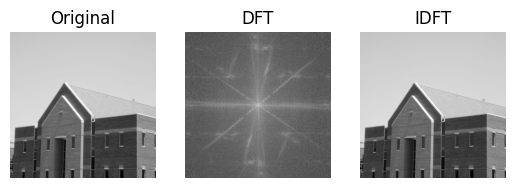

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\building-600by600.tif",0)

#快速傅里叶变换算法得到频率分布,fft2计算二维的傅里叶变换
f = np.fft.fft2(img)
 
#默认结果中心点位置是在左上角,
#调用fftshift()函数转移到中间位置
fshift = np.fft.fftshift(f)       
 
#fft结果是复数, 其绝对值结果是振幅
fimg = np.log(np.abs(fshift))

#傅里叶逆变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg) 

#展示结果
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Original')
plt.axis('off')
plt.subplot(132), plt.imshow(fimg, 'gray'), plt.title('DFT')
plt.axis('off')
plt.subplot(133), plt.imshow(iimg, 'gray'), plt.title('IDFT')
plt.axis('off')
plt.show()

## 频率域滤波

In [18]:
'''填充图像'''
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\building-cropped-834by1114.tif",0)
print(img.shape)

img1 = cv2.copyMakeBorder(img,5,5,5,5,borderType=0)    #零填充
'''cv2.copyMakeBorder()函数
参数1 : src 输入图像
参数2：top, bottom, left, right 对应边界的像素数目
参数3：borderType 要添加哪种类型的边界，类型如下：
    cv2.BORDER_DEFAULT ，是默认的边框。 作用是取镜像对称的像素填充。
    cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）。
    cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcde----fgh|hgfedcb
    cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba
    cv2.BORDER_REPLICATE 重复最后一个元素。  例如: aaaaaa|abcdefgh|hhhhhhh
    cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh|abcdefgh|abcdefg
value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT, 则需要这个参数。


'''
# print(img1.shape)
# print(img1)
# print(img)
# 提取中心部分
center_size = (img.shape[1], img.shape[0])
center = cv2.getRectSubPix(img1, center_size, (img1.shape[1] // 2, img1.shape[0] // 2))
'''
cv2.getRectSubPix(img,(height,width),(x,y))
img为要截取的原图像
(height,width)为要截取图像的高和宽,也就是columns和rows,切记不要弄成行和列了
(x,y)为要截取矩形的中心
返回值为截取后的 图像
'''
# print(center.shape)
# print(center)

(834, 1114)


'\ncv2.getRectSubPix(img,(height,width),(x,y))\nimg为要截取的原图像\n(height,width)为要截取图像的高和宽,也就是columns和rows,切记不要弄成行和列了\n(x,y)为要截取矩形的中心\n返回值为截取后的 图像\n'

### 滤波器传递函数

In [19]:
'''频率域滤波器'''
import numpy as np
import matplotlib.pyplot as plt
import cv2

'''理想低通滤波器'''
def idea_low_pass_filter(FS,radius=5):  
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)
    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    ilpf = np.copy(D)
    ilpf[D > radius] = 0
    ilpf[D <= radius] = 1

    return ilpf

'''高斯低通滤波器'''
def guassian_low_pass_filter(FS,radius=5):
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    glpf = np.copy(D)
    glpf = np.exp(-(glpf**2)/(2*(radius**2)))

    return glpf

'''巴特沃斯低通滤波器'''
def butterworth_low_pass_filter(FS,radius=5,n=1):
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    n为阶数,默认为1
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    blpf = 1/(1+((D/radius)**(2*n)))

    return blpf

'''理想高通滤波器'''
def idea_high_pass_filter(FS,radius=5):  
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)
    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    ilpf = np.copy(D)
    ilpf[D > radius] = 1
    ilpf[D <= radius] = 0

    return ilpf

'''高斯高通滤波器'''
def guassian_high_pass_filter(FS,radius=5):
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    glpf = np.copy(D)
    glpf = np.exp(-(glpf**2)/(2*(radius**2)))
    glpf = 1-glpf

    return glpf

'''巴特沃斯高通滤波器'''
def butterworth_high_pass_filter(FS,radius=5,n=1):
    '''
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    n为阶数,默认为1
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    blpf = np.copy(D)
    blpf = 1/(1+((radius/blpf)**(2*n)))

    return blpf

'''频率域拉普拉斯'''
def laplacian(FS):
    '''FS为图像的傅里叶变换频谱'''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    lap = np.copy(D)
    lap = -4*((np.pi)**2)*(lap**2)
    
    return lap

'''高斯同态滤波器'''
def guassian_homo_filter(FS,yh=0.5,yl=1,c=5,radius=5):
    '''
    H(u,v) = (yh-yl)[1-exp{-c*D**2/radius}]+yl
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)
    
    kernel = (yh-yl)*(1-np.exp(-c*((D**2)/(radius**2))))+yl
    return kernel

In [20]:
'''对图像进行滤波'''
def ImageFilter(imag, kernel = 'ilpf',radius = 5,n = 1,yh=0.5,yl=1,c=5):
    '''
    imag:输入图像
    kernel:滤波器核,默认选取理想低通滤波器
    radius:滤波器半径
    n:巴特沃斯滤波器的阶数,默认为1
    返回值：滤波后的图像 + 原图像的傅里叶频谱图像
    '''
    M = imag.shape[0]
    N = imag.shape[1]
    #填充图像,采用零填充
    img_pad = np.zeros((2*M,2*N))
    img_pad[0:M,0:N] = imag
    #对填充过的图像 进行傅里叶变换
    img_dft = np.fft.fft2(img_pad)
    #中心化
    img_dftshift = np.fft.fftshift(img_dft)
    #fft结果是复数, 其绝对值结果是振幅
    fs = np.log(np.abs(img_dftshift))   #得到傅里叶频谱图
    #在频率域低通滤波

    if kernel == 'ilpf':   #理想低通滤波器
        ilpf = idea_low_pass_filter(img_dftshift,radius)     #构建半径为radius的，中心为频率域中心的理想低通滤波器
        fs_proc = ilpf * img_dftshift    #被低通滤波过的频谱

    elif kernel == 'glpf':  #高斯低通滤波器
        glpf = guassian_low_pass_filter(img_dftshift,radius)   #构建半径为radius的，中心为频率域中心的高斯低通滤波器
        fs_proc = glpf * img_dftshift     #被低通滤波过的频谱
    
    elif kernel == 'blpf':   #巴特沃斯低通滤波器
        blpf = butterworth_low_pass_filter(img_dftshift,radius,n)   #构建半径为radius的，中心为频率域中心的n阶巴特沃斯低通滤波器
        fs_proc = blpf * img_dftshift      #被低通滤波过的频谱

    elif kernel == 'ihpf':  #理想高通滤波器
        ihpf = idea_high_pass_filter(img_dftshift,radius)     #构建半径为radius的，中心为频率域中心的理想高通滤波器
        fs_proc = ihpf * img_dftshift    #被高通滤波过的频谱

    elif kernel == 'ghpf':  #高斯高通滤波器
        ghpf = guassian_high_pass_filter(img_dftshift,radius)   #构建半径为radius的，中心为频率域中心的高斯高通滤波器
        fs_proc = ghpf * img_dftshift     #被高通滤波过的频谱
    
    elif kernel == 'bhpf':   #巴特沃斯高通滤波器
        bhpf = butterworth_high_pass_filter(img_dftshift,radius,n)   #构建半径为radius的，中心为频率域中心的n阶巴特沃斯高通滤波器
        fs_proc = bhpf * img_dftshift      #被高通滤波过的频谱

    elif kernel == 'laplacian':  #拉普拉斯
        lapl = laplacian(img_dftshift)
        fs_proc = lapl * img_dftshift   #拉普拉斯图像的频谱

    elif kernel =='guassian_homo_filter':  #高斯同态滤波器
        homo = guassian_homo_filter(img_dftshift,yh,yl,c,radius)
        fs_proc = homo * img_dftshift  #高斯同态滤波后的频谱

    else:
        print('Parameter Error!!')
        return 0
    #计算逆傅里叶变换
    img_ishift = np.fft.ifftshift(fs_proc)  #去中心化
    img_idft = np.fft.ifft2(img_ishift)   #傅里叶逆变换
    img_idft = np.abs(img_idft)       #逆变换后取绝对值,得到灰度图像
    img_result = img_idft[:M,:N]     #从左上角截取滤波后的图像

    return img_result, fs    #返回滤波后的图像、原图像的傅里叶频谱


### 低通滤波

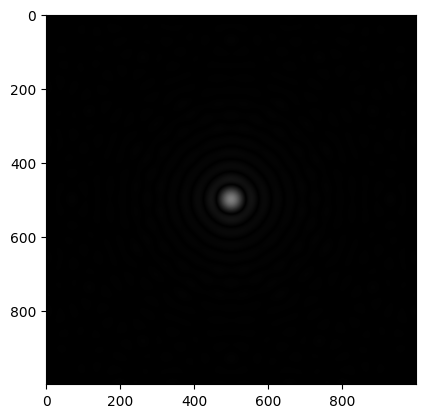

In [21]:
'''理想低通滤波器传递函数对应的空间核函数'''
img_temp = np.zeros((1000,1000))
ILPF = idea_low_pass_filter(img_temp,radius=15)
ifft = np.fft.ifft2(ILPF)
ifft = np.fft.ifftshift(ifft)
space = ifft.real * 1200
space_s = abs(space)
space_s = np.clip(space, 0, space.max())   #将矩阵中所有小于0的变为0，所有大于space.max的变为space.max
# space_s = np.normalize(space_s)

plt.imshow(space_s,'gray')
plt.show()

In [22]:
'''理想低通滤波器在频率域对图像滤波的过程'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\integrated-ckt-damaged.tif",0)
M = img.shape[0]
N = img.shape[1]
#填充图像,采用零填充
img_pad = np.zeros((2*M,2*N))
img_pad[0:M,0:N] = img
#对填充过的图像 进行傅里叶变换
img_dft = np.fft.fft2(img_pad)
#中心化
img_dftshift = np.fft.fftshift(img_dft)

#fft结果是复数, 其绝对值结果是振幅
fs = np.log(np.abs(img_dftshift))   #得到傅里叶频谱图
#在频率域低通滤波
ilpf = idea_low_pass_filter(img_dftshift,radius=50)   #构建半径为50的，中心为频率域中心的理想低通滤波器
fs_ilp = ilpf * img_dftshift    #被低通滤波过的频谱
#计算逆傅里叶变换
img_ishift = np.fft.ifftshift(fs_ilp)   #去中心化
img_idft = np.fft.ifft2(img_ishift)   #逆傅里叶变换
img_idft = np.abs(img_idft)       #逆变换后取绝对值
img_ilp = img_idft[:M,:N]


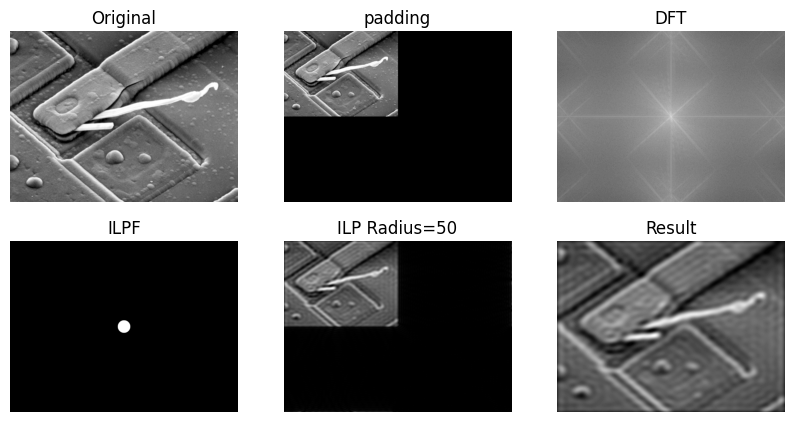

In [23]:
import matplotlib.pyplot as plt
#显示结果
plt.figure(figsize=(10,5))

plt.subplot(231),plt.title('Original'),plt.axis('off')
plt.imshow(img,'gray')
plt.subplot(232),plt.title('padding'),plt.axis('off')
plt.imshow(img_pad,'gray')
plt.subplot(233),plt.title('DFT'),plt.axis('off')
plt.imshow(fs,'gray')
plt.subplot(234),plt.title('ILPF'),plt.axis('off')
plt.imshow(ilpf,'gray')
plt.subplot(235),plt.title('ILP Radius=50'),plt.axis('off')
plt.imshow(img_idft,'gray')
plt.subplot(236),plt.title('Result'),plt.axis('off')
plt.imshow(img_ilp,'gray')

plt.show()

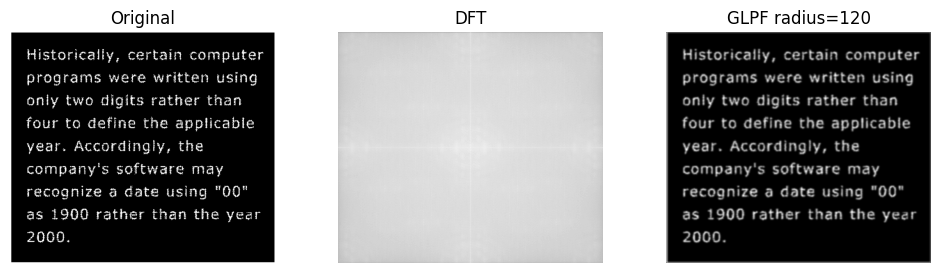

In [24]:
'''在频率域进行高斯低通滤波'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\text-broken.tif",0)

img1,fs = ImageFilter(img,kernel='glpf',radius=120)  #选用半径为120的高斯低通滤波器处理
plt.figure(figsize=(12,3))
plt.subplot(1,3,1),plt.title('Original'),plt.axis('off'),plt.imshow(img,'gray')
plt.subplot(1,3,2),plt.title('DFT'),plt.axis('off'),plt.imshow(fs,'gray')
plt.subplot(1,3,3),plt.title('GLPF radius=120'),plt.axis('off'),plt.imshow(img1,'gray')
plt.show()

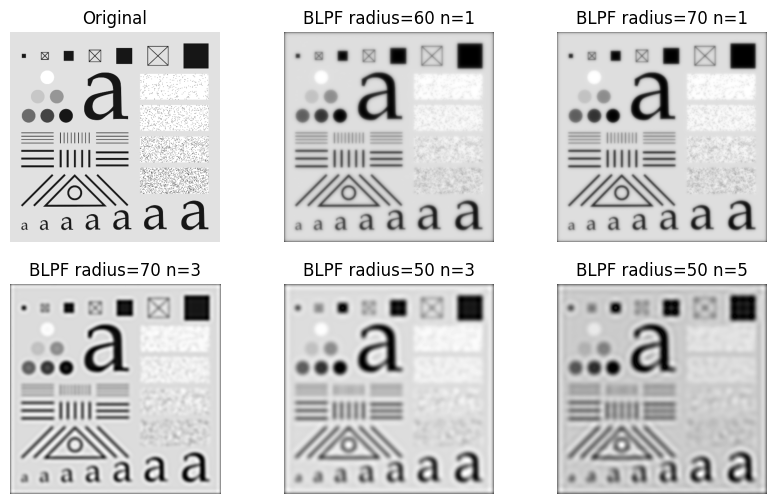

In [25]:
'''巴特沃斯低通滤波'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\testpattern512.tif",0)

img1,fs = ImageFilter(img,kernel='blpf',radius = 60,n=1)
img2,fs = ImageFilter(img,kernel='blpf',radius = 70,n=1)
img3,fs = ImageFilter(img,kernel='blpf',radius = 70,n=3)
img4,fs = ImageFilter(img,kernel='blpf',radius = 50,n=3)
img5,fs = ImageFilter(img,kernel='blpf',radius = 50,n=5)

plt.figure(figsize=(10,6))
plt.subplot(2,3,1),plt.title('Original'),plt.axis('off'),plt.imshow(img,'gray')
plt.subplot(2,3,2),plt.title('BLPF radius=60 n=1'),plt.axis('off'),plt.imshow(img1,'gray')
plt.subplot(2,3,3),plt.title('BLPF radius=70 n=1'),plt.axis('off'),plt.imshow(img2,'gray')
plt.subplot(2,3,4),plt.title('BLPF radius=70 n=3'),plt.axis('off'),plt.imshow(img3,'gray')
plt.subplot(2,3,5),plt.title('BLPF radius=50 n=3'),plt.axis('off'),plt.imshow(img4,'gray')
plt.subplot(2,3,6),plt.title('BLPF radius=50 n=5'),plt.axis('off'),plt.imshow(img5,'gray')
plt.show()

### 高通滤波

C:\Users\23282\AppData\Local\Temp\ipykernel_3276\1931307660.py:112: RuntimeWarning: divide by zero encountered in divide
  blpf = 1/(1+((radius/blpf)**(2*n)))


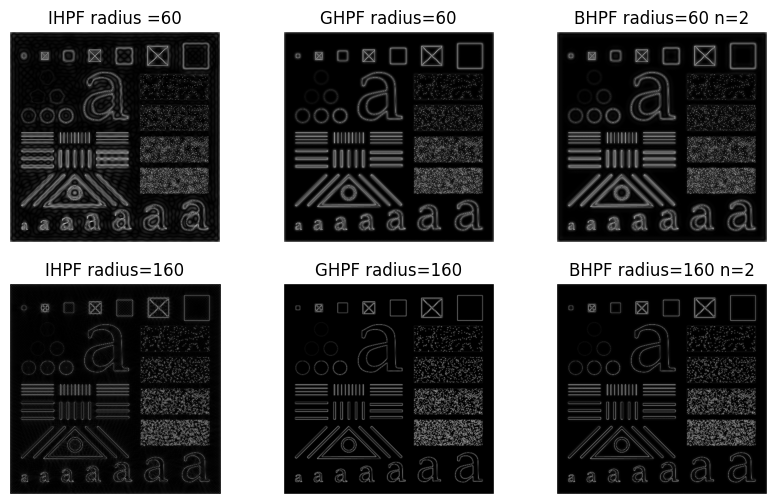

In [26]:
'''频率域高通滤波'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\testpattern512.tif",0)

img1,fs = ImageFilter(img,kernel='ihpf',radius=60)
img2,fs = ImageFilter(img,kernel='ghpf',radius=60)
img3,fs = ImageFilter(img,kernel='bhpf',radius=60,n=2)
img4,fs = ImageFilter(img,kernel='ihpf',radius=160)
img5,fs = ImageFilter(img,kernel='ghpf',radius=160)
img6,fs = ImageFilter(img,kernel='bhpf',radius=160,n=2)

plt.figure(figsize=(10,6))
plt.subplot(2,3,1),plt.title('IHPF radius =60'),plt.axis('off'),plt.imshow(img1,'gray')
plt.subplot(2,3,2),plt.title('GHPF radius=60'),plt.axis('off'),plt.imshow(img2,'gray')
plt.subplot(2,3,3),plt.title('BHPF radius=60 n=2'),plt.axis('off'),plt.imshow(img3,'gray')
plt.subplot(2,3,4),plt.title('IHPF radius=160'),plt.axis('off'),plt.imshow(img4,'gray')
plt.subplot(2,3,5),plt.title('GHPF radius=160'),plt.axis('off'),plt.imshow(img5,'gray')
plt.subplot(2,3,6),plt.title('BHPF radius=160 n=2'),plt.axis('off'),plt.imshow(img6,'gray')
plt.show()

C:\Users\23282\AppData\Local\Temp\ipykernel_3276\1931307660.py:112: RuntimeWarning: divide by zero encountered in divide
  blpf = 1/(1+((radius/blpf)**(2*n)))


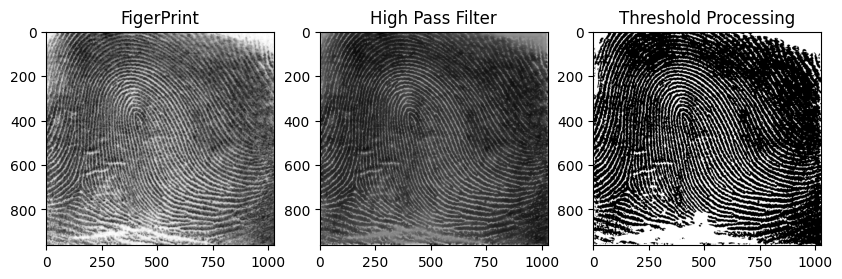

In [27]:
'''使用高通滤波和阈值处理增强图像'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\thumb-print.tif",0)

img_f, fs = ImageFilter(img,kernel='bhpf',radius=60,n=4)
img_f = img + img_f
#阈值处理
img_thr = np.copy(img_f)
img_thr[img_f <=185]=0
img_thr[img_f > 185]=1
plt.figure(figsize=(10,6))
plt.subplot(131),plt.title('FigerPrint'),plt.imshow(img,'gray')
plt.subplot(132),plt.title('High Pass Filter'),plt.imshow(img_f,'gray')
plt.subplot(133),plt.title('Threshold Processing'),plt.imshow(img_thr,'gray')
plt.show()

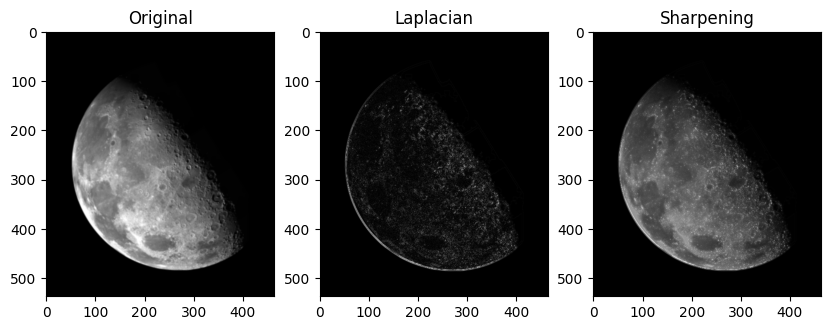

In [28]:
'''频率域拉普拉斯'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\moon-blurred.tif",0)

img1,fs = ImageFilter(img,kernel='laplacian')
img1 = img1 - img1.min()
imgs = 255*(img1/(img1.max()))    #对图像进行标定
img_f = img + 1*imgs

plt.figure(figsize=(10,6))
plt.subplot(131),plt.title('Original'),plt.imshow(img,'gray')
plt.subplot(132),plt.title('Laplacian'),plt.imshow(imgs,'gray')
plt.subplot(133),plt.title('Sharpening'),plt.imshow(img_f,'gray')
plt.show()


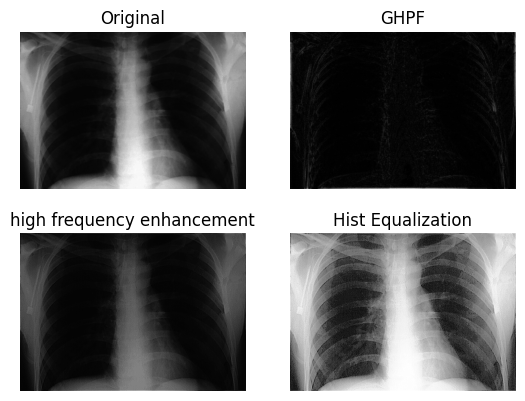

In [29]:
'''使用高频强调滤波增强图像'''
from PIL import Image
#读入图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\chestXray.tif",0)

   #高斯高通滤波
img_gf ,fs = ImageFilter(img , kernel='ghpf',radius=50)
   #高频强调滤波
   #构建GHPF传递函数
ghpf = guassian_high_pass_filter(img,radius = 120)
#对原图进行傅里叶变换
img_dft = np.fft.fft2(img)
img_dft = np.fft.fftshift(img_dft)  #中心化
k=5
img_G =(1 + k * ghpf)*img_dft   
#进行傅里叶逆变换
img_idft = np.fft.ifftshift(img_G)  #去中心化
img_idft = np.fft.ifft2(img_idft)  #逆变换
img2 = np.abs(img_idft)

#对结果进行直方图均衡化
img2_nor = (img2 - img2.min())/(img2.max()-img2.min())   #归一化
img2_nor *= 255  # 变换为0-255的灰度值
im = Image.fromarray(img2_nor)
im = im.convert('L')  # 转为灰度图，如果是彩色图则改L为‘RGB’
im = np.array(im)
equ = cv2.equalizeHist(im,256)   #直方图均衡化

plt.figure()
plt.subplot(221),plt.title('Original'),plt.axis('off'),plt.imshow(img,'gray')
plt.subplot(222),plt.title('GHPF'),plt.axis('off'),plt.imshow(img_gf,'gray')
plt.subplot(223),plt.title('high frequency enhancement'),plt.axis('off'),plt.imshow(img2,'gray')
plt.subplot(224),plt.title('Hist Equalization'),plt.axis('off'),plt.imshow(equ,'gray')
plt.show()

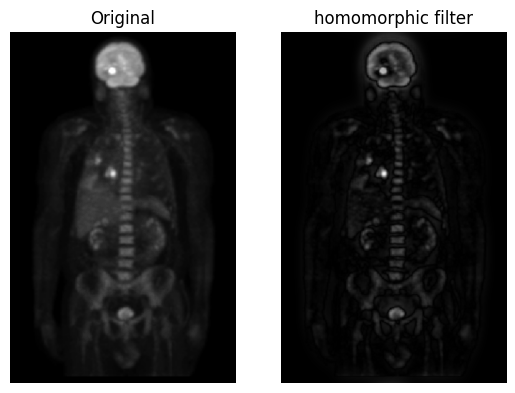

In [30]:
'''同态滤波'''
'''高斯同态滤波器'''
def guassian_homo_filter(FS,yh=1,yl=0.5,c=5,radius=20):
    '''
    H(u,v) = (yh-yl)[1-exp{-c*D**2/radius}]+yl
    FS为图像的傅里叶变换频谱
    radius为滤波器半径,默认为5
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)

    D = np.sqrt((u - center[1])**2 + (v - center[0])**2)

    kernel = (yh-yl)*(1-np.exp(-c*((D**2)/(radius**2))))+yl
    return kernel

img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\PET-scan.tif",0)
img_dft = np.fft.fft2(img)
img_dft = np.fft.fftshift(img_dft)
ghf = guassian_homo_filter(img_dft,yh=3.0,yl=0.4,c=5,radius=20)

img_f = ghf * img_dft
img_ishift = np.fft.ifftshift(img_f)
img_idft = np.fft.ifft2(img_ishift)
img_result = np.abs(img_idft)

plt.figure()
plt.subplot(121),plt.title('Original'),plt.axis('off'),plt.imshow(img,'gray')
plt.subplot(122),plt.title('homomorphic filter'),plt.axis('off'),plt.imshow(img_result,'gray')
plt.show()


### 陷波滤波

(246, 168)


C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:23: RuntimeWarning: divide by zero encountered in divide
  kernel1 = (1/(1+(radius/D1)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:24: RuntimeWarning: divide by zero encountered in divide
  kernel2 = (1/(1+(radius/D2)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:25: RuntimeWarning: divide by zero encountered in divide
  kernel3 = (1/(1+(radius/D3)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:26: RuntimeWarning: divide by zero encountered in divide
  kernel4 = (1/(1+(radius/D4)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:27: RuntimeWarning: divide by zero encountered in divide
  kernel11 = (1/(1+(radius/D11)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:28: RuntimeWarning: divide by zero encountered in divide
  kernel22 = (1/(1+(radius/D22)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_3276\358276101.py:29: Runtim

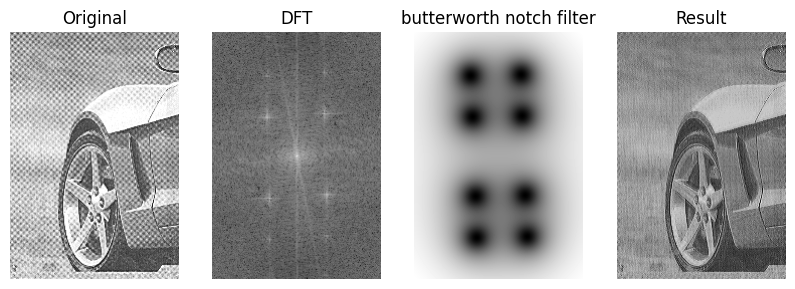

In [31]:
'''使用陷波滤波删除数字化印刷物图像的莫尔模式'''
def butterworth_notch_filter(FS,s1,s2,s3,s4,radius = 5,n=1):  #构建一个具有四个陷波对的巴特沃斯陷波滤波器，每个陷波区域的半径默认为5
    '''FS:输入的频谱图象
    s1,s2,s3,s4:为陷波对的其中一个陷波区域的坐标
    radius:半径,默认为5
    n:阶数,默认为1
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)
    
    #手动输入四个陷波对的位置
    D1 = np.sqrt((u - s1[1])**2 + (v - s1[0])**2)
    D11 = np.sqrt((u -(2*center[1] - s1[1]))**2 + (v - (2*center[0] - s1[0]))**2)   #关于中心点中心对称
    D2 = np.sqrt((u - s2[1])**2 + (v - s2[0])**2)
    D22 = np.sqrt((u -(2*center[1] - s2[1]))**2 + (v - (2*center[0] - s2[0]))**2)
    D3 = np.sqrt((u - s3[1])**2 + (v - s3[0])**2)
    D33 = np.sqrt((u -(2*center[1] - s3[1]))**2 + (v - (2*center[0] - s3[0]))**2)
    D4 = np.sqrt((u - s4[1])**2 + (v - s4[0])**2)
    D44 = np.sqrt((u -(2*center[1] - s4[1]))**2 + (v - (2*center[0] - s4[0]))**2)
    kernel1 = (1/(1+(radius/D1)**n))
    kernel2 = (1/(1+(radius/D2)**n))
    kernel3 = (1/(1+(radius/D3)**n))
    kernel4 = (1/(1+(radius/D4)**n))
    kernel11 = (1/(1+(radius/D11)**n))
    kernel22 = (1/(1+(radius/D22)**n))
    kernel33 = (1/(1+(radius/D33)**n))
    kernel44 = (1/(1+(radius/D44)**n))

    kernel = kernel1*kernel2*kernel3*kernel4*kernel11*kernel22*kernel33*kernel44
    return kernel

img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\car-moire-pattern.tif",0)
print(img.shape)
img_dft = np.fft.fft2(img)
img_shift = np.fft.fftshift(img_dft)
img_fs = np.log(abs(img_shift))

bnf = butterworth_notch_filter(img_shift,(83,107),(162,110),(42,106),(203,112),radius=15, n =2)

nf1 = bnf * img_shift

nf1 = np.fft.ifftshift(nf1)
nf1 = np.fft.ifft2(nf1)
result = np.abs(nf1)

plt.figure(figsize=(10,10))
plt.subplot(141),plt.title('Original'),plt.axis('off')
plt.imshow(img,'gray')
plt.subplot(142),plt.title('DFT'),plt.axis('off')
plt.imshow(img_fs,'gray')
plt.subplot(143),plt.title('butterworth notch filter'),plt.axis('off')
plt.imshow(bnf,'gray')
plt.subplot(144),plt.title('Result'),plt.axis('off')
plt.imshow(result,'gray')
plt.show()

(674, 674)


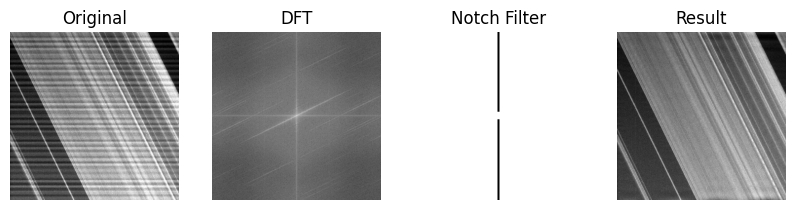

In [32]:
'''使用陷波滤波去除周期干扰'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\suaturn-rings-sinusoidal-interf.tif",0)
print(img.shape)
img_dft = np.fft.fft2(img)
img_shift = np.fft.fftshift(img_dft)
img_fs = np.log(abs(img_shift))

def get_notch_filter(FS):
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    

    D = np.ones((M,N),dtype='float32')
    D[0:center[1]-15, center[0] - 4:center[0] + 4]= 0
    D[center[1]+15: M, center[0] - 4:center[0] + 4] = 0

    return D
    
nf = get_notch_filter(img_shift)
nf1 = nf * img_shift

nf1 = np.fft.ifftshift(nf1)
nf1 = np.fft.ifft2(nf1)
result = np.abs(nf1)


plt.figure(figsize=(10,10))
plt.subplot(141),plt.title('Original'),plt.axis('off')
plt.imshow(img,'gray')
plt.subplot(142),plt.title('DFT'),plt.axis('off')
plt.imshow(img_fs,'gray')
plt.subplot(143),plt.title('Notch Filter'),plt.axis('off')
plt.imshow(nf,'gray')
plt.subplot(144),plt.title('Result'),plt.axis('off')
plt.imshow(result,'gray')
plt.show()